In [1]:
from typing  import TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
class AgentState(TypedDict):
    num1 :int 
    num2 : int 
    optr :str
    final :int
    num3 : int 
    num4 :int
    optr2 :str
    final2 : int

In [7]:
def adder1(state: AgentState) -> AgentState:
    state['final'] = state['num1']+state['num2']
    return state
def adder2(state:AgentState) -> AgentState:
    state['final2'] = state['num3'] + state['num4']
    return state

def sub1(state:AgentState) -> AgentState :
    state['final'] = state['num1']-state['num2']
    return state
def sub2(state:AgentState) -> AgentState:
    state['final2'] = state['num3'] - state['num4']
    return state

def router(state:AgentState)->AgentState :

    if state['optr'] == "+" :
        return "addition_operation"
    elif state['optr'] == "-" :
        return "subtraction_operation"

def router2(state:AgentState)->AgentState :

    if state['optr2'] == "+" :
        return "addition_operation2"
    elif state['optr2'] == "-" :
        return "subtraction_operation2"


In [8]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder1)
graph.add_node("subtract_node",sub1)

graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2",sub2)

graph.add_node("router",lambda state:state)
graph.add_node("router2",lambda state:state)

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    router,
     {
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node",
     }
)

graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")

graph.add_conditional_edges(
    "router2",
    router2,
     {
        "addition_operation2":"add_node2",
        "subtraction_operation2":"subtract_node2"
     }
)

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app = graph.compile()

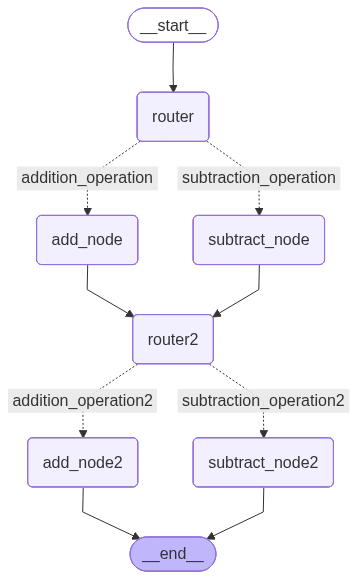

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:


initial_state = AgentState(num1=10,num2=5, optr="-",num3=7,num4=2,optr2="+")
print(app.invoke(initial_state))

{'num1': 10, 'num2': 5, 'optr': '-', 'final': 5, 'num3': 7, 'num4': 2, 'optr2': '+', 'final2': 9}
